In [1]:
import pandas as pd 
df = pd.read_csv("../Data/athlete_events.csv")

# A) Hur många länder är med i datan?
df.info()
df["NOC"].nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


230

In [9]:
#B) Vilka länder är med? (förkortningarna räcker)
df["NOC"].unique()
df_noc = pd.read_csv("../Data/noc_regions.csv")
print( df_noc["region"][ df_noc["NOC"].isin( df["NOC"] ) ].unique() )

['Afghanistan' 'Curacao' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Antigua'
 'Australia' 'Argentina' 'Armenia' 'Aruba' 'American Samoa' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Burundi' 'Belgium'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Belize' 'Belarus'
 'Czech Republic' 'Boliva' 'Botswana' 'Brazil' 'Bahrain' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Central African Republic' 'Cambodia' 'Canada'
 'Cayman Islands' 'Republic of Congo' 'Chad' 'Chile' 'China' 'Ivory Coast'
 'Cameroon' 'Democratic Republic of the Congo' 'Cook Islands' 'Colombia'
 'Comoros' 'Cape Verde' 'Costa Rica' 'Croatia' 'Greece' 'Cuba' 'Cyprus'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'Eritrea' 'El Salvador' 'Spain' 'Estonia' 'Ethiopia' 'Russia' 'Fiji'
 'Finland' 'France' 'Germany' 'Micronesia' 'Gabon' 'Gambia' 'UK'
 'Guinea-Bissau' 'Georgia' 'Equatorial Guinea' 'Ghana' 'Grenada'
 'Guatemala' 'Guinea' 'Guam' 'Guyana' 'Haiti' 'Honduras' 'Hungary'
 'Indonesia' 'Ind

In [8]:
#C) Vilka sporter är med?
df.columns
print( df["Sport"].unique() )

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


In [5]:
# D) Vilka medaljtyper finns? 
df.columns
print( df["Medal"].dropna().unique() )

['Gold' 'Bronze' 'Silver']


In [ ]:
# E) Ta reda på statestik för åldern: medelvärde, median, min, max, standardavvikelse
df["Age"].describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


In [ ]:
# F) Utforska datan vidare med egna frågor
print( df.isnull().sum()[ df.isnull().any() == True ], "\n" ) 


desc = df.describe().map(lambda element: f"{element:.0f}" )  
desc = pd.concat( [desc, pd.DataFrame(index=["Unique"])]  )

for col in df:
    print( f"{col}: {df[col].nunique()}" )
    if col in desc:
        desc.loc["Unique", col] = df[col].nunique()
print()

desc


Age         9474
Height     60171
Weight     62875
Medal     231333
dtype: int64 

ID: 135571
Name: 134732
Sex: 2
Age: 74
Height: 95
Weight: 220
Team: 1184
NOC: 230
Games: 51
Year: 35
Season: 2
City: 42
Sport: 66
Event: 765
Medal: 3



,ID,Age,Height,Weight,Year
count,271116,261642,210945,208241,271116
mean,68249,26,175,71,1978
std,39022,6,11,14,30
min,1,10,127,25,1896
25%,34643,21,168,60,1960
50%,68205,24,175,70,1988
75%,102097,28,183,79,2002
max,135571,97,226,214,2016
Unique,135571,74,95,220,35


array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='Age', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='Age', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='Age'>,
        <Axes: xlabel='Height', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>]], dtype=object)

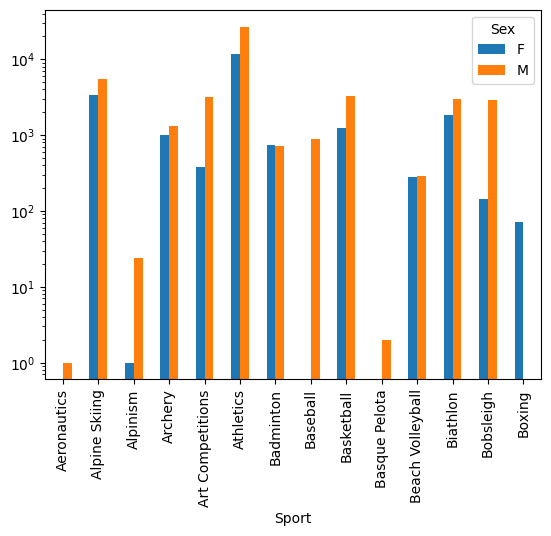

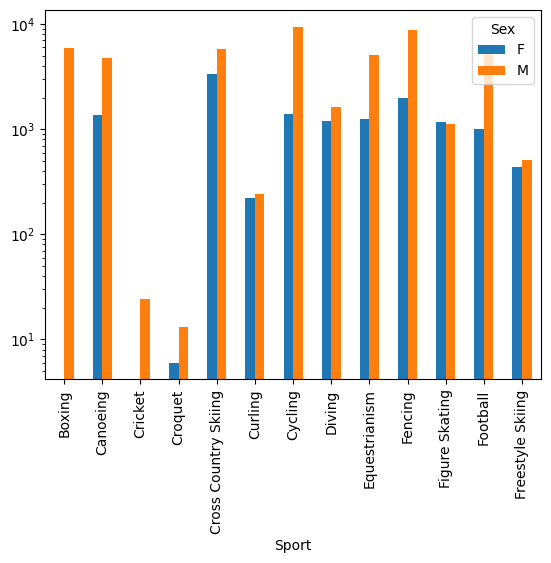

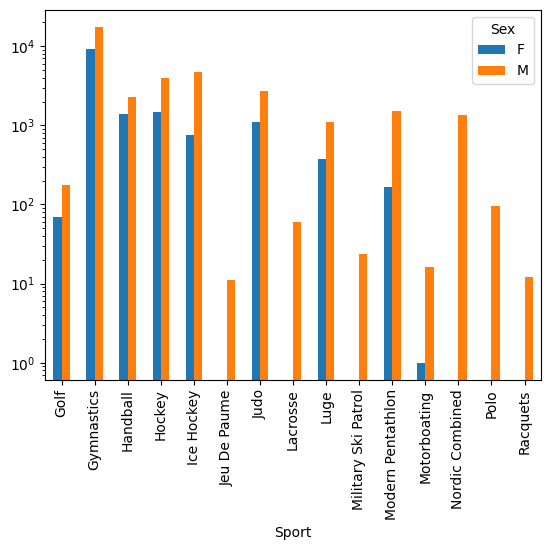

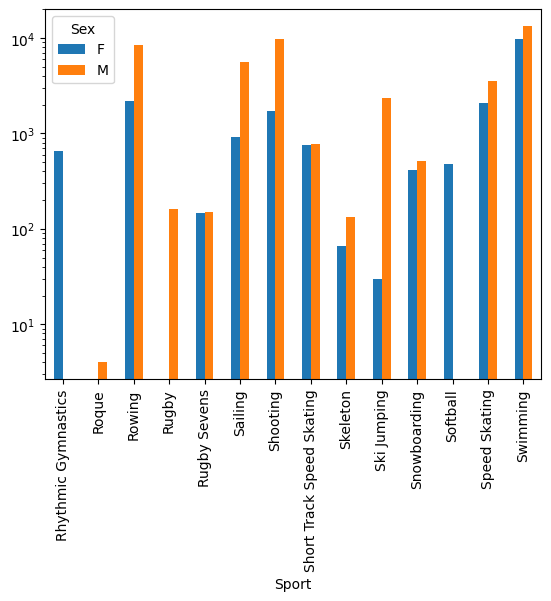

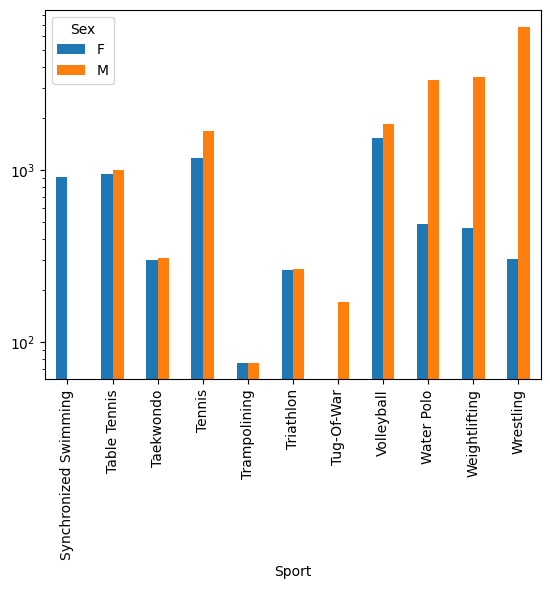

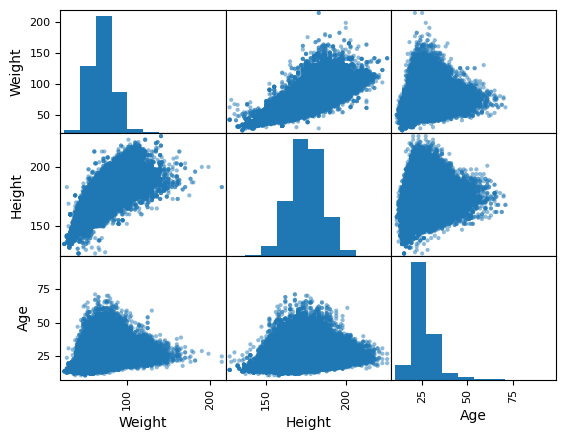

In [ ]:
# g) Diagram över könsfördelning

by_sp_se  = df.groupby(["Sport","Sex"])["Sex"].size()
mem = 0
for n in range(24,121,24):
    by_sp_se.iloc[mem:n].unstack().plot( kind="bar", logy=True)
    mem=n
#pd.plotting.scatter_matrix( df[["Weight", "Height", "Age"]]  )

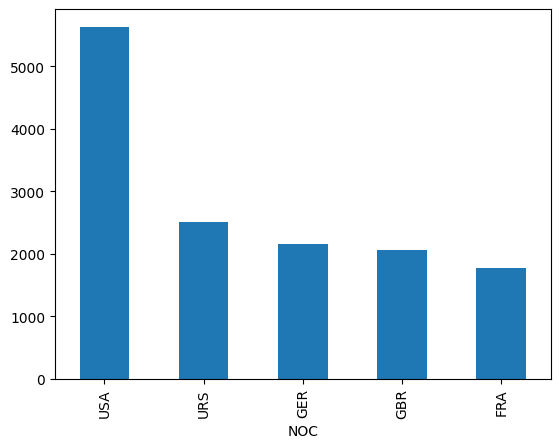

In [18]:
# h) diagram över topp 10 länder som tagit flest medaljer
#df.groupby(["NOC",""])["Sex"].size()
#import matplotlib.pyplot as plt 
df_medals_only =  df.dropna(subset="Medal")
df_medals_only.groupby("NOC").size().sort_values(ascending=False).head().plot( kind="bar")
print()
#plt.show()